In [131]:
import pandas as pd
import numpy as np
df_rcc = pd.read_excel('MLDatasetECT.xlsx', sheet_name='result_constituencies_Candidate') 
df_rcp = pd.read_excel('MLDatasetECT.xlsx', sheet_name='result_constituencies_PartyList') 
df_rcc.head()

cons_id mp_app_id  mp_app_rank  mp_app_vote  mp_app_vote_percent  party_id
0   ACR_1   ACR_1_1            9          459              0.43477       706
1   ACR_1  ACR_1_10            1        38275             36.25419       709
2   ACR_1  ACR_1_11           13          126              0.11935       712
3   ACR_1  ACR_1_12           12          127              0.12029       742
4   ACR_1  ACR_1_13           11          212              0.20081       761

## Preprocessing data

In [132]:
df_rcp.head()

cons_id  party_id  party_list_vote  party_list_vote_percent
0   ACR_1       701             4550                  4.30977
1   ACR_1       702              185                  0.17523
2   ACR_1       703               67                  0.06346
3   ACR_1       705            33576                 31.80328
4   ACR_1       706              132                  0.12503

In [133]:
df_rcc_cf = df_rcc.drop(columns=['mp_app_id','mp_app_rank','mp_app_vote'],axis=1)
df_rcc_cf.head()

cons_id  mp_app_vote_percent  party_id
0   ACR_1              0.43477       706
1   ACR_1             36.25419       709
2   ACR_1              0.11935       712
3   ACR_1              0.12029       742
4   ACR_1              0.20081       761

In [134]:
df_rcp_cf = df_rcp.drop(columns=['party_list_vote'],axis=1)
df_rcp_cf.head()

cons_id  party_id  party_list_vote_percent
0   ACR_1       701                  4.30977
1   ACR_1       702                  0.17523
2   ACR_1       703                  0.06346
3   ACR_1       705                 31.80328
4   ACR_1       706                  0.12503

In [135]:
filtered_df_rcc = df_rcc_cf[df_rcc_cf['cons_id'].str.contains('BKK')]
filtered_df_rcc.head()
filtered_df_rcc.to_excel('df_rcc.xlsx',index=False)

In [136]:
filtered_df_rcp = df_rcp_cf[df_rcp_cf['cons_id'].str.contains('BKK')]
filtered_df_rcp.head()

cons_id  party_id  party_list_vote_percent
603   BKK_1       701                  3.78468
604   BKK_1       702                  0.01165
605   BKK_1       703                  0.01059
606   BKK_1       705                 14.67794
607   BKK_1       706                  1.77423

In [137]:
sorted_df_rcc = filtered_df_rcc.sort_values(by=['cons_id','party_id']).reset_index(drop=True)
sorted_df_rcc = sorted_df_rcc[['cons_id','party_id','mp_app_vote_percent']]
sorted_df_rcc

cons_id  party_id  mp_app_vote_percent
0     BKK_1       701             12.22791
1     BKK_1       705             16.19477
2     BKK_1       706              1.32088
3     BKK_1       709              0.69486
4     BKK_1       719              0.66203
..      ...       ...                  ...
493   BKK_9       729              0.55105
494   BKK_9       743              2.29602
495   BKK_9       762              1.87949
496   BKK_9       763             17.50174
497   BKK_9       769              0.43230

[498 rows x 3 columns]

In [138]:
sorted_df_rcp = filtered_df_rcp.sort_values(by=['cons_id','party_id']).reset_index(drop=True)
sorted_df_rcp

cons_id  party_id  party_list_vote_percent
0      BKK_1       701                  3.78468
1      BKK_1       702                  0.01165
2      BKK_1       703                  0.01059
3      BKK_1       705                 14.67794
4      BKK_1       706                  1.77423
...      ...       ...                      ...
2206   BKK_9       780                  0.04082
2207   BKK_9       781                  0.04267
2208   BKK_9       783                  0.00186
2209   BKK_9       784                  0.06865
2210   BKK_9       786                  0.12245

[2211 rows x 3 columns]

In [139]:
# Assuming you have a DataFrame named 'df' and you want to loop through the 'column_name' column
copy_df_rcc = sorted_df_rcc
for index in sorted_df_rcp.index:
    # 'index' will be the index of the row, and 'value' will be the value in the specified column
    if sorted_df_rcp.loc[index,'party_id'] != sorted_df_rcc.loc[index,'party_id']:
        sorted_df_rcc = sorted_df_rcc.loc[:index].append(sorted_df_rcp.loc[index,['cons_id','party_id']], ignore_index=True)
        
sorted_df_rcc = sorted_df_rcc.drop_duplicates(subset=['cons_id','party_id']).reset_index(drop=True)
sorted_df_rcc = sorted_df_rcc.sort_values(by=['cons_id','party_id']).reset_index(drop=True)
sorted_df_rcc = sorted_df_rcc[['cons_id','party_id','mp_app_vote_percent']]

sorted_df_rcc.to_excel('sorted_df_rcc_real.xlsx',index=False)
sorted_df_rcc

C:\Users\natch\AppData\Local\Temp\ipykernel_21252\2838566007.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sorted_df_rcc = sorted_df_rcc.loc[:index].append(sorted_df_rcp.loc[index,['cons_id','party_id']], ignore_index=True)
C:\Users\natch\AppData\Local\Temp\ipykernel_21252\2838566007.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sorted_df_rcc = sorted_df_rcc.loc[:index].append(sorted_df_rcp.loc[index,['cons_id','party_id']], ignore_index=True)
C:\Users\natch\AppData\Local\Temp\ipykernel_21252\2838566007.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sorted_df_rcc = sorted_df_rcc.loc[:index].append(sorted_df_rcp.loc[index,['cons_id','party_id']], ignore_index=True)
C:\Users\natch\AppData\Local\Temp\ipykernel

cons_id  party_id  mp_app_vote_percent
0      BKK_1       701             12.22791
1      BKK_1       702                  NaN
2      BKK_1       703                  NaN
3      BKK_1       705             16.19477
4      BKK_1       706                  NaN
...      ...       ...                  ...
2206   BKK_9       780                  NaN
2207   BKK_9       781                  NaN
2208   BKK_9       783                  NaN
2209   BKK_9       784                  NaN
2210   BKK_9       786                  NaN

[2211 rows x 3 columns]

In [140]:
new_sorted_df_rcc = sorted_df_rcc.merge(copy_df_rcc, on=['cons_id','party_id'], how='left')
new_sorted_df_rcc = new_sorted_df_rcc.drop(columns=['mp_app_vote_percent_x'],axis=1)
new_sorted_df_rcc.rename(columns={'mp_app_vote_percent_y':'mp_app_vote_percent'}, inplace=True)
new_sorted_df_rcc.fillna(0, inplace=True)
new_sorted_df_rcc.to_excel('new_sorted_df_rcc_real.xlsx',index=False)
new_sorted_df_rcc

cons_id  party_id  mp_app_vote_percent
0      BKK_1       701             12.22791
1      BKK_1       702              0.00000
2      BKK_1       703              0.00000
3      BKK_1       705             16.19477
4      BKK_1       706              1.32088
...      ...       ...                  ...
2206   BKK_9       780              0.00000
2207   BKK_9       781              0.00000
2208   BKK_9       783              0.00000
2209   BKK_9       784              0.00000
2210   BKK_9       786              0.00000

[2211 rows x 3 columns]

c:\Users\natch\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


cons_id  party_id  mp_app_vote_percent  party_list_vote_percent
0      BKK_1       701             12.22791                  3.78468
1      BKK_1       702              0.00000                  0.01165
2      BKK_1       703              0.00000                  0.01059
3      BKK_1       705             16.19477                 14.67794
4      BKK_1       706              1.32088                  1.77423
...      ...       ...                  ...                      ...
2206   BKK_9       780              0.00000                  0.04082
2207   BKK_9       781              0.00000                  0.04267
2208   BKK_9       783              0.00000                  0.00186
2209   BKK_9       784              0.00000                  0.06865
2210   BKK_9       786              0.00000                  0.12245

[2211 rows x 4 columns]

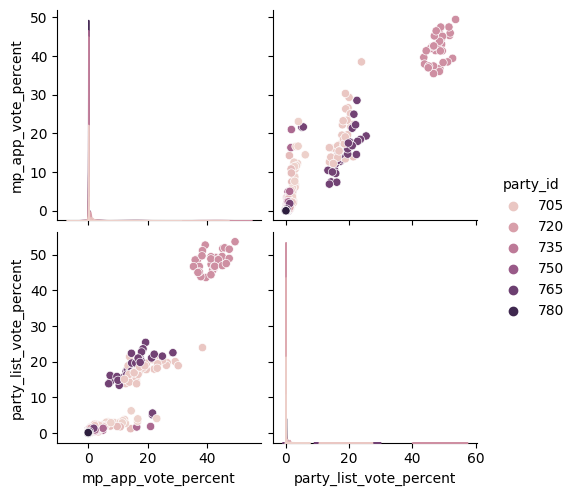

In [141]:
import seaborn as sns
merge_df = pd.merge(new_sorted_df_rcc,sorted_df_rcp,on=['party_id','cons_id'])
sns.pairplot(merge_df,hue='party_id')
merge_df

In [142]:
merge_df.describe()

party_id  mp_app_vote_percent  party_list_vote_percent
count  2211.000000          2211.000000              2211.000000
mean    742.955224             1.424917                 1.443707
std      25.128327             6.077960                 6.593106
min     701.000000             0.000000                 0.000000
25%     722.000000             0.000000                 0.009915
50%     741.000000             0.000000                 0.030130
75%     767.000000             0.000000                 0.100530
max     786.000000            49.469070                53.654200

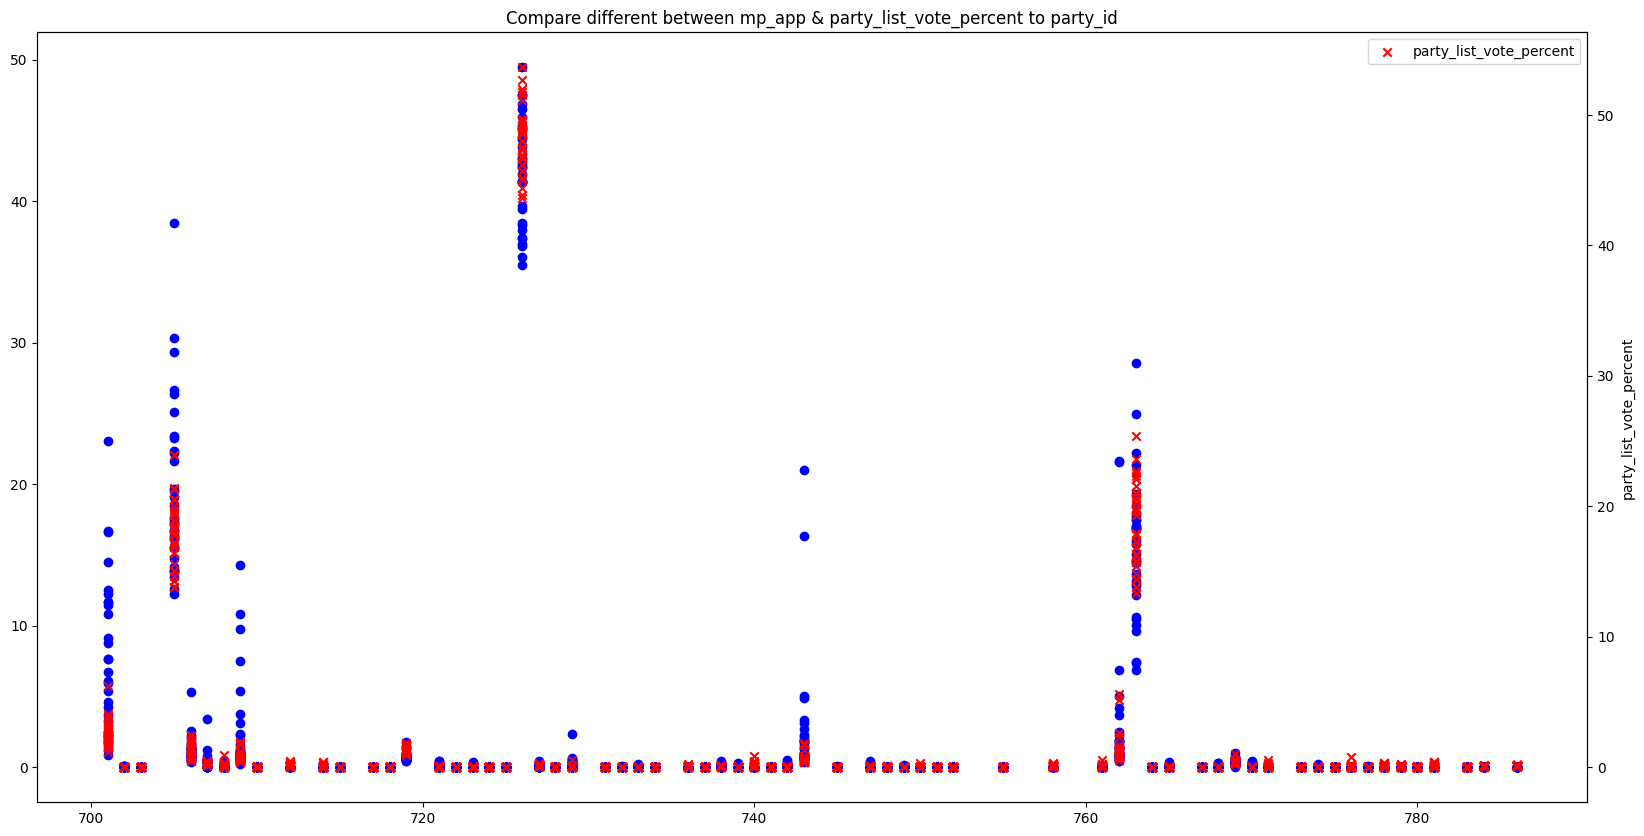

In [143]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.title("Compare different between mp_app & party_list_vote_percent to party_id")
gx = new_sorted_df_rcc['party_id']
gy1 = new_sorted_df_rcc['mp_app_vote_percent']
gy2 = sorted_df_rcp['party_list_vote_percent']
plt.scatter(gx,gy1,label='mp_app_vote_percent',color='blue',marker='o')
ax2 = plt.twinx()
plt.scatter(gx,gy2,label='party_list_vote_percent',color='red',marker='x')
plt.xlabel('party_id')
plt.ylabel('mp_app_vote_percent')
ax2.set_ylabel('party_list_vote_percent')
plt.legend(loc='upper right')

plt.show()

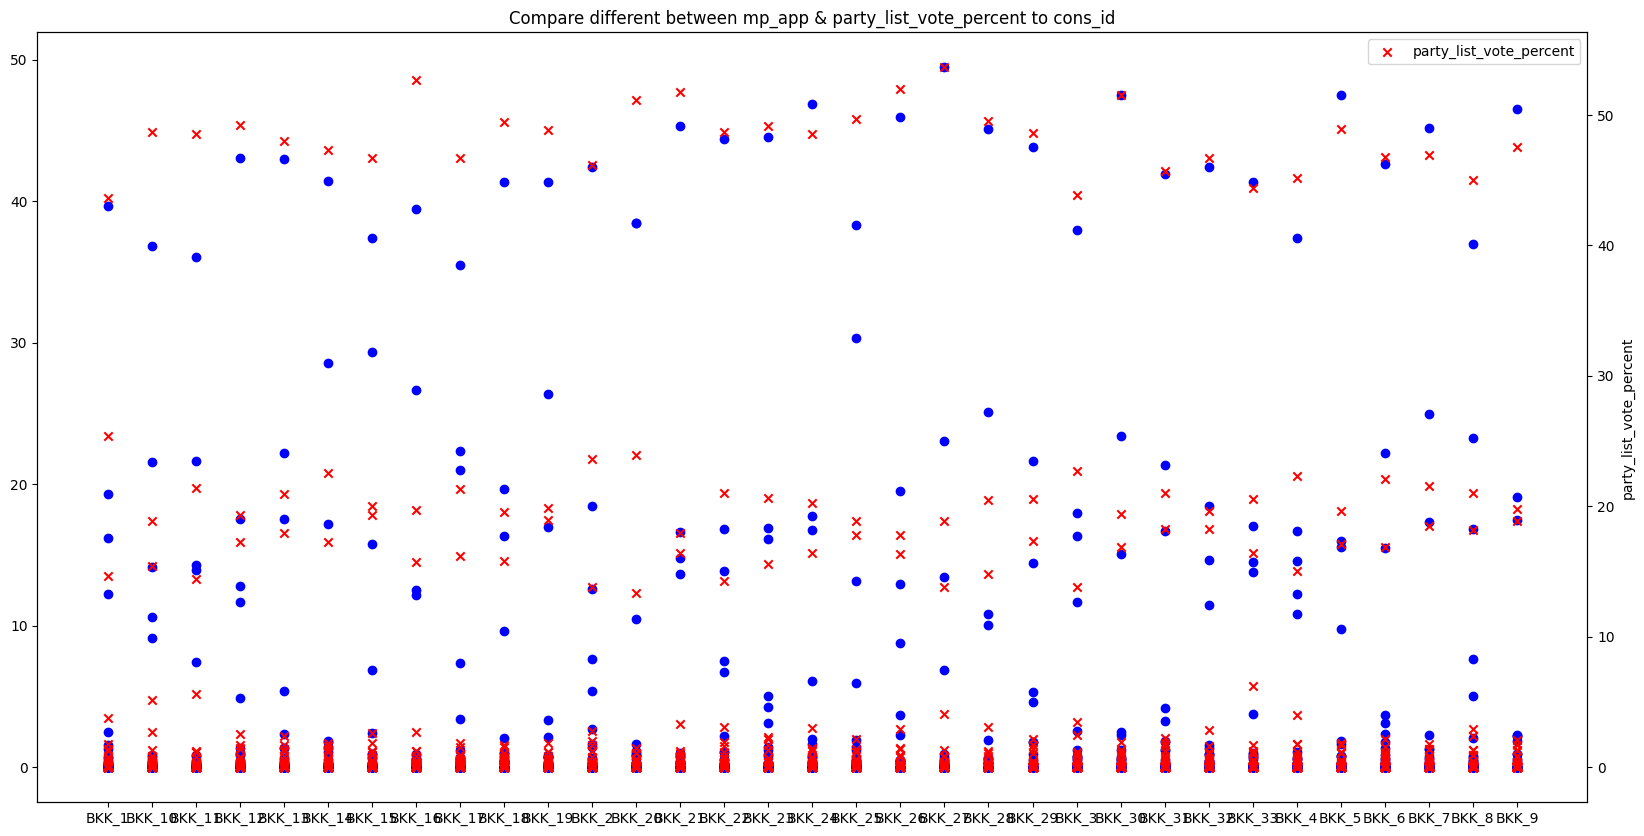

In [144]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.title("Compare different between mp_app & party_list_vote_percent to cons_id")
gx = new_sorted_df_rcc['cons_id']
gy1 = new_sorted_df_rcc['mp_app_vote_percent']
gy2 = sorted_df_rcp['party_list_vote_percent']
plt.scatter(gx,gy1,label='mp_app_vote_percent',color='blue',marker='o')
ax2 = plt.twinx()
plt.scatter(gx,gy2,label='party_list_vote_percent',color='red',marker='x')
plt.xlabel('cons_id')
plt.ylabel('mp_app_vote_percent')
ax2.set_ylabel('party_list_vote_percent')
plt.legend(loc='upper right')

plt.show()

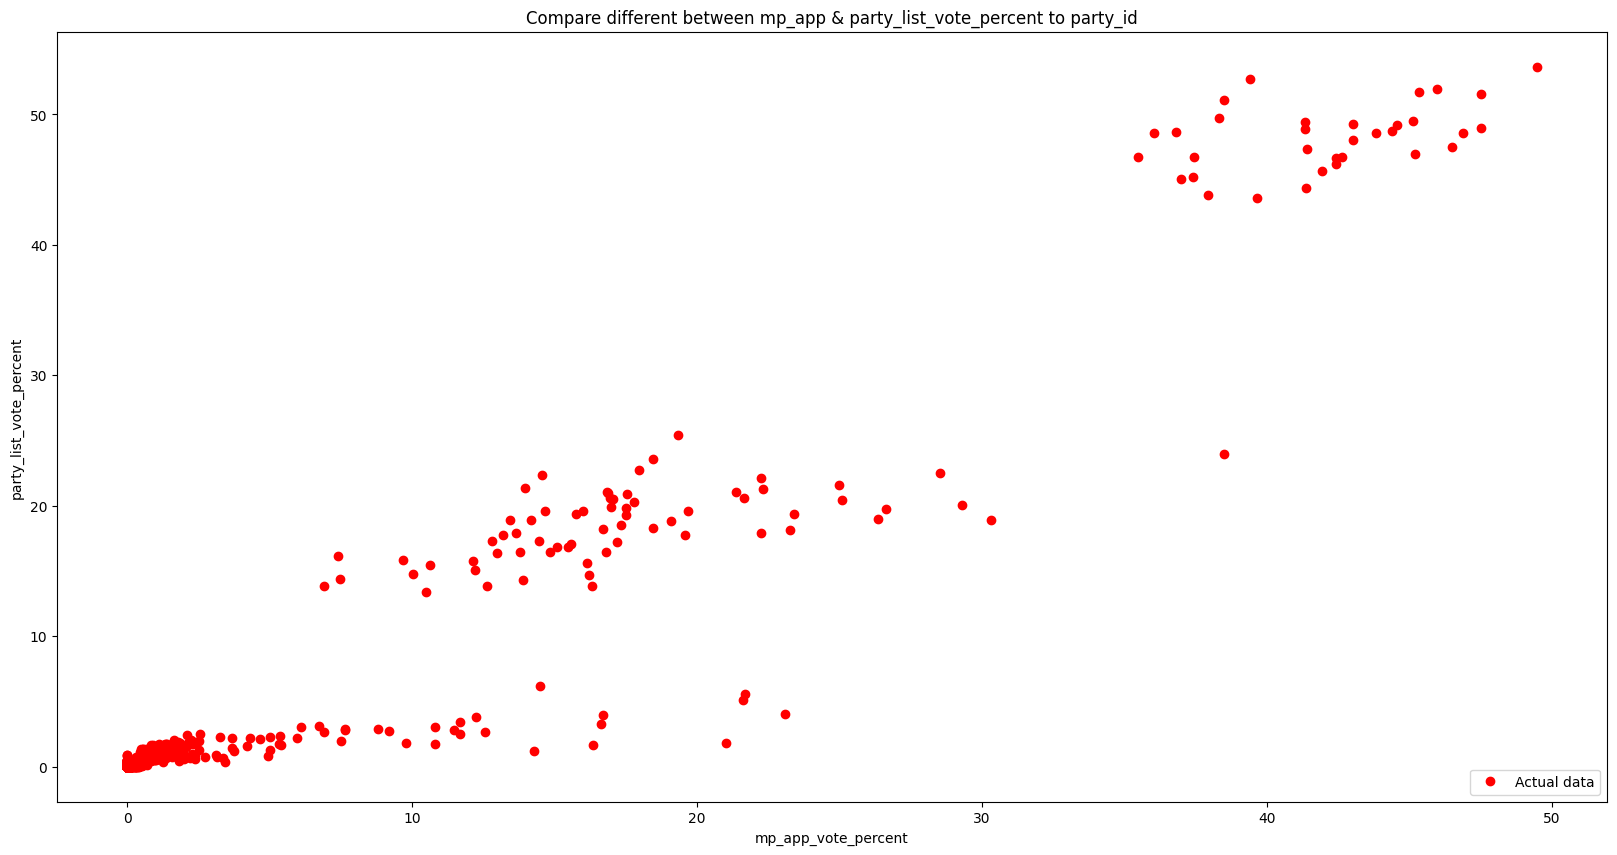

In [157]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.title("Compare different between mp_app & party_list_vote_percent to party_id")
gx = merge_df['mp_app_vote_percent']
gy = merge_df['party_list_vote_percent']
plt.xlabel('mp_app_vote_percent')
plt.ylabel('party_list_vote_percent')
plt.plot(gx,gy,'or',label = 'Actual data')
plt.legend(loc="lower right")
plt.show()

In [ ]:
df_correlation = merge_df.corr()
df_correlation

C:\Users\natch\AppData\Local\Temp\ipykernel_21252\700768803.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_correlation = merge_df.corr()


party_id  mp_app_vote_percent  \
party_id                 1.000000            -0.150319   
mp_app_vote_percent     -0.150319             1.000000   
party_list_vote_percent -0.117331             0.968459   

                         party_list_vote_percent  
party_id                               -0.117331  
mp_app_vote_percent                     0.968459  
party_list_vote_percent                 1.000000

## Linear Regression Model

In [ ]:
#import machine learning library (Linear regression model)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
#Data preparation by spilting data to trainig and testing
x = merge_df.mp_app_vote_percent.values.reshape(-1,1)
y = merge_df.party_list_vote_percent.values.reshape(-1,1)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)
# Show size of training and testing
print('Size of x training:',len(x_train))
print('Size of y training:',len(y_train))
print('Size of x testing:',len(x_test))
print('Size of y testing:',len(y_test))

Size of x training: 1768
Size of y training: 1768
Size of x testing: 443
Size of y testing: 443


In [ ]:
#Build linear regression model
model_linear = LinearRegression()
model_linear.fit(x_train,y_train)

#y = theta0 + theta1*x
print("Theta0: ",model_linear.intercept_[0])
print("Theta1: ",model_linear.coef_[0][0])
print("y = {:.4f}+{:.4f}x".format(model_linear.intercept_[0],model_linear.coef_[0][0]))

Theta0:  -0.054875885970509186
Theta1:  1.0413479369847922
y = -0.0549+1.0413x


## Result of Linear Regression Model

In [149]:
y_pred = model_linear.predict(x_train)
y_pred

array([[-0.05487589],
       [-0.05487589],
       [-0.05487589],
       ...,
       [-0.05487589],
       [-0.05487589],
       [-0.05487589]])

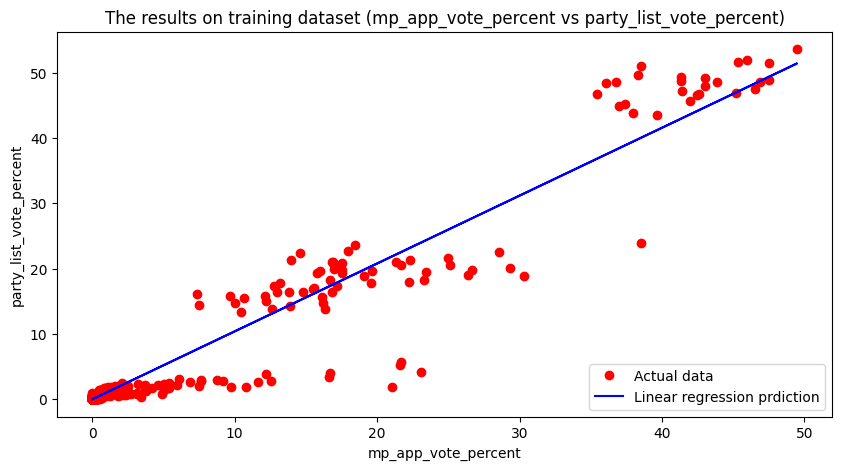

In [150]:
#Predict on trainig set
y_pred = model_linear.predict(x_train)

#Plot lineae regression line vs actual data on training set
plt.figure(figsize = (10,5))
plt.title('The results on training dataset (mp_app_vote_percent vs party_list_vote_percent)')
plt.xlabel('mp_app_vote_percent')
plt.ylabel('party_list_vote_percent')
plt.plot(x_train,y_train,'or',label = 'Actual data')
plt.plot(x_train,y_pred,'-b',label="Linear regression prdiction")
plt.legend(loc="lower right")
plt.show()


In [152]:
# Model measurement on trainig dataset
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

print("MAE = ",round(metrics.mean_absolute_error(y_train,y_pred),4)) #mean absolute error
print("MSE = ",round(metrics.mean_squared_error(y_train,y_pred),4)) #mean square error
print("RMSE = ",round(np.sqrt(metrics.mean_squared_error(y_train,y_pred)),4)) #root mean square error
print("MAPE = ",round(MAPE(y_train,y_pred),4)) #mean absolute percentage error
print("R-Square = ",round(np.sqrt(metrics.r2_score(y_train,y_pred)),4)) #R-Square

MAE =  0.4399
MSE =  2.7334
RMSE =  1.6533
MAPE =  inf
R-Square =  0.9678


C:\Users\natch\AppData\Local\Temp\ipykernel_21252\1425041426.py:3: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100


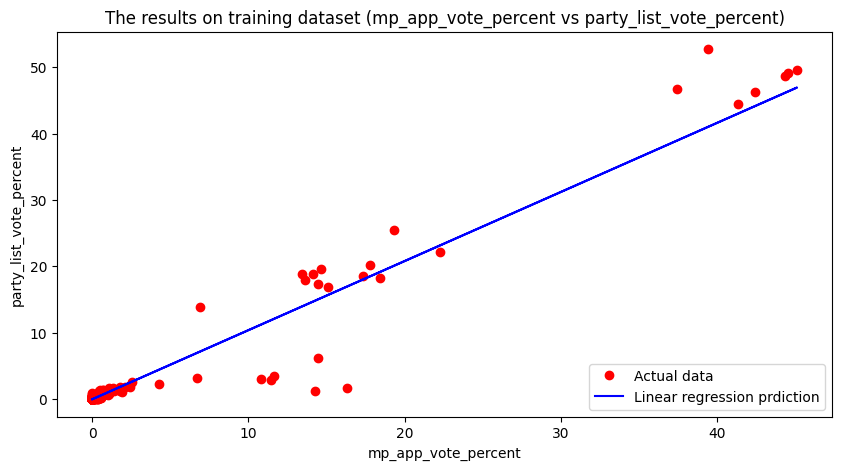

In [158]:
#Predict on trainig set
y_pred = model_linear.predict(x_test)

#Plot lineae regression line vs actual data on testining set
plt.figure(figsize = (10,5))
plt.title('The results on training dataset (mp_app_vote_percent vs party_list_vote_percent)')
plt.xlabel('mp_app_vote_percent')
plt.ylabel('party_list_vote_percent')
plt.plot(x_test,y_test,'or',label='Actual data')
plt.plot(x_test,y_pred,'-b',label="Linear regression prdiction")
plt.legend(loc="lower right")
plt.show()

In [159]:
print("MAE = ",round(metrics.mean_absolute_error(y_test,y_pred),4)) #mean absolute error
print("MSE = ",round(metrics.mean_squared_error(y_test,y_pred),4)) #mean square error
print("RMSE = ",round(np.sqrt(metrics.mean_squared_error(y_test,y_pred)),4)) #root mean square error
print("MAPE = ",round(MAPE(y_test,y_pred),4)) #mean absolute percentage error
print("R-Square = ",round(np.sqrt(metrics.r2_score(y_test,y_pred)),4)) #R-Square

MAE =  0.4343
MSE =  2.5716
RMSE =  1.6036
MAPE =  528.4736
R-Square =  0.971
